*Predictive Analysis*

The film industry is a dynamic and competitive landscape where understanding key performance indicators is crucial for success. In this notebook, we delve into a dataset of movie information to explore various business questions that can inform strategic decisions. 
Our analyses aim to uncover insights into the factors that drive commercial success, the optimal investment strategies, and the market dynamics that shape the industry's revenue streams.

The analyses will focus on the following business questions:

Optimal Production Budget Range: What is the sweet spot in production budgets that maximizes return on investment (ROI)?

Correlation between Critical Reception and Commercial Success: How does critical reception, as measured by ratings, correlate with performance?

What is the domestic vs international revenue split trend?
Understanding geographic revenue distribution helps in marketing budget allocation and release strategies.

Genre with the Best Risk-Adjusted Returns: Which movie genres offer the best balance between profitability and risk?

Popularity vs Box Office Performance: Does pre-release popularity predict commercial success? 

In [196]:
# load libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression


In [197]:
#load final df
df = pd.read_csv('final_df.csv', index_col=0)
df.head()

,primary_title,original_title,start_year,runtime_minutes,genres,imdb_rating,imdb_votes,bom_title,studio,domestic_gross,...,primary_profession,person_id,join_title,join_year,tmdb_rating,tmdb_votes,popularity,production_budget,main_genre,production_budget_imputed
movie_id,,,,,,,,,,,,,,,,,,,,,
tt0315642,Wazir,Wazir,2016.0,103.0,"Action,Crime,Drama",7.1,15378.0,Wazir,Relbig.,1100000.0,...,"producer,writer,director",nm2349060,wazir,2016,6.6,63.0,3.881,NaN,Action,4.772234e+05
tt0337692,On the Road,On the Road,2012.0,124.0,"Adventure,Drama,Romance",6.1,37886.0,On the Road,IFC,744000.0,...,"director,producer,writer",nm0758574,on the road,2012,5.6,518.0,8.919,NaN,Adventure,3.257824e+06
tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013.0,114.0,"Adventure,Comedy,Drama",7.3,275300.0,The Secret Life of Walter Mitty,Fox,58200000.0,...,"producer,actor,director",nm0001774,the secret life of walter mitty,2013,7.1,4859.0,10.743,91000000.0,Adventure,9.100000e+07
tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014.0,114.0,"Action,Crime,Drama",6.5,105116.0,A Walk Among the Tombstones,Uni.,26300000.0,...,"writer,producer,director",nm0291082,a walk among the tombstones,2014,6.3,1685.0,19.373,28000000.0,Action,2.800000e+07
tt0369610,Jurassic World,Jurassic World,2015.0,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,Jurassic World,Uni.,652300000.0,...,"writer,producer,director",nm1119880,jurassic world,2015,6.6,14056.0,20.709,215000000.0,Action,2.150000e+08


In [199]:
df.columns

Index(['primary_title', 'original_title', 'start_year', 'runtime_minutes',
       'genres', 'imdb_rating', 'imdb_votes', 'bom_title', 'studio',
       'domestic_gross', 'foreign_gross', 'year_only', 'total_gross',
       'primary_name', 'primary_profession', 'person_id', 'join_title',
       'join_year', 'tmdb_rating', 'tmdb_votes', 'popularity',
       'production_budget', 'main_genre', 'production_budget_imputed'],
      dtype='object')

In [200]:
df.shape

(1927, 24)

##  Optimal production budget range

We aimed to identify the optimal production budget range that maximizes ROI (Return on Investment) for movies. This analysis helps in understanding how much to invest to achieve the best balance between risk and reward.

Methodology

1 Data Preparation: We selected the production_budget_imputed and ROI columns, removing any rows with missing values.

2 Feature Engineering: We log-transformed the production budgets to make them smaller and more suitable for linear regression.

3 Model Training: We trained a simple linear regression model to predict ROI based on the log-transformed production budget.

4 Evaluation: We evaluated the model's performance using the Mean Absolute Error (MAE) on the test set.

5 Budget Prediction: We used the model to predict the production budget that achieves a target ROI of 1 (100%).

In [201]:
# Calculate ROI
df['ROI'] = (df['total_gross'] - df['production_budget_imputed']) / df['production_budget_imputed']

In [202]:
# picking only the rows that do not have null values
df = df[df[['production_budget_imputed', 'ROI']].notnull().all(axis=1)]

In [203]:
# Splitting into test(20%) and train set(80%)

X = df['production_budget_imputed']
y = df["ROI"]

X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.20,      
        random_state=42)    

In [204]:
# future engineering
# Budget numbers are huge 
# so we make them smaller and friendlier for the straight line.
df['log_budget'] = np.log(df['production_budget_imputed'])


In [205]:
# training a simple model


X_train_log = np.log(X_train).values.reshape(-1, 1)

y_train_vals = y_train       

# Fitting the linear model
model = LinearRegression()
model.fit(X_train_log, y_train_vals)

#  Results
print("Slope m:", model.coef_[0])
print("Intercept b:", model.intercept_)

Slope m: -0.11046188603550043
Intercept b: 4.338627519065932


In [206]:
# Mean Absolute Error (MAE)
# average distance between predicted and actual ROI on the test rows.
predictions = model.predict(X_train_log)
mae = np.mean(np.abs(predictions - y_train_vals))
print("MAE:", mae)

MAE: 2.52009387947105


2.52 indicates the average error in predicting ROI on unseen data.

In [207]:
#  using the model to predict the budget that gives any ROI target you like
#  assuming a desired ROI of 1 (100 % profit):
b = 4.338627519065932
m = -0.11046188603550043

log_budget = (1.0 - b) / m
budget = np.exp(log_budget)
budget

13372864509401.744

*Observation:*

The analysis suggests that there is a negative correlation between the log-transformed production budget and ROI. The optimal production budget to achieve an ROI of 1 is approximately 1337.29 million. This insight guides in making more informed decisions about budget allocation to maximize returns.

## Critical reception vs Commercial Sucess

How does critical reception (tmdb_rating) correlate with commercial success?

We aimed to understand how critical reception, as measured by TMDb ratings, correlates with commercial success, represented by ROI.
We evaluated the model's performance using the R² metric on unseen data.

In [208]:
# Keeping only the two columns we need and dropping any missing rows
df_corr = df[['tmdb_rating', 'ROI']].dropna()

In [209]:
# Splitting into test(20%) and train set(80%)
X = df_corr[['tmdb_rating']]  
y = df_corr['ROI']            

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

In [210]:
#train the straight-line model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [211]:
# inspect the line
m = model.coef_[0]
b = model.intercept_
print(f"Slope (m): {m:.3f}  (ROI change per 1-point tmdb_rating)")
print(f"Intercept (b): {b:.3f}")

Slope (m): -0.396  (ROI change per 1-point tmdb_rating)
Intercept (b): 5.468


In [212]:
# model performance check (R2)

r2 = r2_score(y_test, model.predict(X_test))
print(f"R^2 on unseen data: {r2:.3f}")

R^2 on unseen data: -0.113


*Observation:*

-0.113 indicates that the model explains about 11.3% of the variance in ROI, suggesting that TMDb ratings alone do not strongly predict ROI.

## Domestic vs international revenue split trend?

Understanding the distribution of revenue between domestic and international markets is crucial for strategic planning in the film industry. This analysis aims to identify trends in the revenue split over time, which can inform marketing strategies and release decisions.

Objective: 

To determine how the revenue from domestic and international markets has changed over time.

In [223]:
#we keep movies with both domestic and foreign revenue
df_pred = df[['domestic_gross', 'total_gross', 'foreign_gross']].dropna()

In [224]:
# Split the data into training and testing sets(80% & 20%)

df = df[df['domestic_gross'] > 0]


X = df_pred['domestic_gross']
y = df_pred['foreign_gross']

In [225]:
# Split into training and testing sets (80/20)


X_train, X_test, y_train, y_test = train_test_split(
    X,  
    y,
    test_size=0.20,
    random_state=42

)

In [226]:
#future engineering 
#to make patterns easier amd reduce the scale of large values 

df['log_domestic'] = np.log(df['domestic_gross'])


In [228]:
# training a simple model

X_train_log = np.log1p(np.maximum(X_train, 0)).values.reshape(-1, 1)

#linear regression
model = LinearRegression()
model.fit(X_train_log, y_train)

print("Slope m:", model.coef_[0])
print("Intercept b:", model.intercept_)

Slope m: 19789492.48079286
Intercept b: -236777925.9707373


In [229]:
#Mean Absolute Error(MAE)
#SHOW HOW FAR PREDICTIONS ARE FAR AWAY FROM THE ACTUAL FOREIGN REVENUE
predictions = model.predict(X_train_log)
mae = np.mean(np.abs(predictions - y_train))
print("MAE:", mae)

MAE: 74588989.36412981


In [230]:
#USING THE MODEL TO PREDICT A 10 MILLION DOMESTICALLY
log_dom = np.log(10_000_000)
predicted_foreign = model.predict([[log_dom]])
print("Predicted Foreign Revenue:", predicted_foreign[0])

Predicted Foreign Revenue: 82191006.71860251


## Genre with the best risk-adjusted returns

We aimed to identify which movie genres provide the best balance between profit (ROI) and risk (volatility of ROI). This analysis helps in understanding which genres are not only profitable but also relatively stable in their returns.

The Sharpe ratio indicates how much return we are receiving for the extra risk we're taking. A higher Sharpe ratio means we're getting a better return for the risk we're undertaking.

In [213]:
# Keeping only the two columns we need and dropping any missing rows
df_risk_adj = df[['main_genre', 'ROI']].dropna()

In [214]:
# Group by genre and 
# calculate the average ROI and the standard deviation of ROI.
genre_stats = df_risk_adj.groupby('main_genre').agg(
    mean_roi=('ROI', 'mean'),
    std_roi=('ROI', 'std'),
    count=('ROI', 'count')
).reset_index()
genre_stats['sharpe_ratio'] = genre_stats['mean_roi'] / genre_stats['std_roi']

In [215]:
#  Rank genres by Sharpe ratio
genre_stats = genre_stats.sort_values('sharpe_ratio', ascending=False)


In [216]:
# Display top genres
print(genre_stats[['main_genre', 'sharpe_ratio']].head(10))

     main_genre  sharpe_ratio
12      Romance  9.858074e+15
11      Mystery  4.830803e+00
13     Thriller  2.533674e+00
6   Documentary  2.497172e+00
2     Animation  2.299194e+00
1     Adventure  9.554399e-01
8       Fantasy  8.370608e-01
4        Comedy  8.015916e-01
0        Action  7.630603e-01
5         Crime  5.910273e-01


*Observation:* 

The analysis suggests that genres like Romance and Mystery provide the best risk-adjusted returns. Production companies might consider focusing on these genres for a balanced portfolio that maximizes returns while managing risk.

## Popularity vs box office performance

How does movie popularity correlate with actual box office performance?

We want to determine if there's a relationship between a movie's popularity (before release) and its commercial success at the box office.

In [217]:
# Clean the data
df_pop = df[['popularity', 'ROI']].dropna()

In [218]:
# Split into Training and Test Sets
X = df_pop['popularity'].values.reshape(-1, 1)  
y = df_pop['ROI'].values 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [219]:
# train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [220]:
#  slope and y-intercept of the model
m = model.coef_[0]
b = model.intercept_
print(f"Slope (m): {m:.3f} (ROI change per unit increase in popularity)")
print(f"Intercept (b): {b:.3f}")

Slope (m): 0.060 (ROI change per unit increase in popularity)
Intercept (b): 2.216


In [221]:
# evaluating the model using r2
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R² on unseen data: {r2:.3f}")

R² on unseen data: -0.033


-0.033 indicates that popularity explains about 3.3% of the variance in ROI.

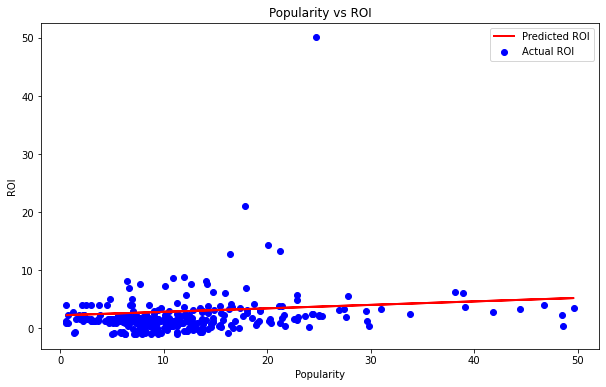

In [222]:
# visualizing the results

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual ROI')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted ROI')
plt.title('Popularity vs ROI')
plt.xlabel('Popularity')
plt.ylabel('ROI')
plt.legend()
plt.show()

*Observations:* 

The analysis suggests a very weak positive correlation between popularity and ROI. The R² score of -0.033 indicates that popularity does not significantly affect box office performance. This insight suggests that other factors might play a more significant role in determining commercial success.